In [0]:
#mounting your drive

from google.colab import drive
drive.mount('/content/drive')
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf

In [0]:
! pip install pydicom opencv-python scikit-image
!pip install torch torchvision kornia pyarrow 
! pip3 install med2image


     |████████████████████████████████| 35.3MB 119kB/s 
     |████████████████████████████████| 163kB 3.4MB/s 
     |████████████████████████████████| 61kB 3.9MB/s 
     |████████████████████████████████| 634kB 10.6MB/s 
  Created wheel for med2image: filename=med2image-2.1.1-cp36-none-any.whl size=13112 sha256=7315efdc42450b596fd8a8197003e6e73e88e2e93081dc28d840a357efdb5cae
  Stored in directory: /root/.cache/pip/wheels/70/6f/02/69fa0cab2d66eba5c5c0cca44d62cbf26b7773f3d48591273b
  Created wheel for pfmisc: filename=pfmisc-1.3.32-cp36-none-any.whl size=43383 sha256=416f3c8f302d8fb698daee93046bd47f1b5ac7728566f78f867082df57195525
  Stored in directory: /root/.cache/pip/wheels/c8/ab/2f/d00fb7e356b774222be46dd5ffd57877e05c69cb199a426fe5
  Created wheel for pudb: filename=pudb-2019.2-cp36-none-any.whl size=63233 sha256=7df99590157d50171fac898c168104bd9015794b278e192b3941188b3cfd8455
  Stored in directory: /root/.cache/pip/wheels/5a/17/bd/9b8fc905b71d3032f3e76757a275a25c46c6f9bbb5fcf7b5e9
 

In [0]:
!pip uninstall -y pyarrow
!pip install --upgrade pip
!pip install --upgrade pyarrow
!pyarrow -v

Uninstalling pyarrow-0.14.1:
  Successfully uninstalled pyarrow-0.14.1
     |████████████████████████████████| 1.5MB 3.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 63.8 MB 34 kB/s 


/bin/bash: pyarrow: command not found


In [0]:
import csv
import math

import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow.keras import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from tensorflow.keras.layers import Concatenate, Conv2D, UpSampling2D, Reshape, BatchNormalization, Activation
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import epsilon

In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Project - Final')
path = '.'

os.listdir()

['stage_2_detailed_class_info.csv',
 'GCP Credits Request Link - RSNA.txt',
 'stage_2_sample_submission.csv',
 'stage_2_train_labels.csv',
 'rsna-pneumonia-detection-challenge.zip',
 'stage_2_test_images',
 'stage_2_train_PNG',
 'stage_2_train_images',
 'Mask_RCNN',
 'mask_rcnn_coco.h5',
 'working',
 'model-0.02.h5',
 'stage_2_test_PNG',
 'TRAIN_CSV.csv',
 'VALID_CSV.csv',
 'model-0.37.h5',
 'model-0.38.h5',
 'model-0.00.h5']

In [0]:
# Read the Detailed Class Info
deta_lbls = pd.read_csv('stage_2_detailed_class_info.csv')

# Printing the duplicate Patient IDs
duplicate_patients = deta_lbls[deta_lbls.patientId.duplicated(keep=False)].sort_values("patientId")

# Replacing column name
deta_lbls.rename(columns = {'patientId':'PatientID'}, inplace = True) 

# Dropping duplicates
deta_lbls = deta_lbls.drop_duplicates(["PatientID"], keep='first').reset_index(drop=True)
deta_lbls.head(10)

,PatientID,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
6,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
7,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
8,008c19e8-a820-403a-930a-bc74a4053664,No Lung Opacity / Not Normal
9,009482dc-3db5-48d4-8580-5c89c4f01334,Normal


In [0]:
# Read the Detailed Label Class Info
lbls = pd.read_csv('stage_2_train_labels.csv')

# Printing the duplicate Patient IDs
dup_patients = lbls[lbls.patientId.duplicated(keep=False)].sort_values("patientId")

# Fill NaN values with 0s
lbls.x.fillna(0, inplace=True)
lbls.y.fillna(0, inplace=True)
lbls.width.fillna(0, inplace=True)
lbls.height.fillna(0, inplace=True)

# Replacing column name
lbls.rename(columns = {'patientId':'PatientID'}, inplace = True) 

# Dont need to drop duplicates
# lbls = lbls.drop_duplicates(["PatientID"], keep='first').reset_index(drop=True)
lbls.head(10)

,PatientID,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,0.0,0.0,0.0,0.0,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,0.0,0.0,0.0,0.0,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [0]:
# Combine train_image and train_BBox tables
comb = lbls.join(deta_lbls.set_index('PatientID'), 'PatientID', how='outer')
comb['PatientID'] = './stage_2_train_PNG/' + comb['PatientID'].astype(str) + '.png'
comb.head(10)


,PatientID,x,y,width,height,Target,class
0,./stage_2_train_PNG/0004cfab-14fd-4e49-80ba-63...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
1,./stage_2_train_PNG/00313ee0-9eaa-42f4-b0ab-c1...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
2,./stage_2_train_PNG/00322d4d-1c29-4943-afc9-b6...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
3,./stage_2_train_PNG/003d8fa0-6bf1-40ed-b54c-ac...,0.0,0.0,0.0,0.0,0,Normal
4,./stage_2_train_PNG/00436515-870c-4b36-a041-de...,264.0,152.0,213.0,379.0,1,Lung Opacity
5,./stage_2_train_PNG/00436515-870c-4b36-a041-de...,562.0,152.0,256.0,453.0,1,Lung Opacity
6,./stage_2_train_PNG/00569f44-917d-4c86-a842-81...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
7,./stage_2_train_PNG/006cec2e-6ce2-4549-bffa-ea...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
8,./stage_2_train_PNG/00704310-78a8-4b38-8475-49...,323.0,577.0,160.0,104.0,1,Lung Opacity
9,./stage_2_train_PNG/00704310-78a8-4b38-8475-49...,695.0,575.0,162.0,137.0,1,Lung Opacity


In [0]:
comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  30227 non-null  object 
 1   x          30227 non-null  float64
 2   y          30227 non-null  float64
 3   width      30227 non-null  float64
 4   height     30227 non-null  float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [0]:
train_df = comb[:24168]
valid_df = comb[24168:]

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24168 entries, 0 to 24167
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  24168 non-null  object 
 1   x          24168 non-null  float64
 2   y          24168 non-null  float64
 3   width      24168 non-null  float64
 4   height     24168 non-null  float64
 5   Target     24168 non-null  int64  
 6   class      24168 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.5+ MB


In [0]:
train_df.tail(10)

,PatientID,x,y,width,height,Target,class
24158,./stage_2_train_PNG/d930583e-0c91-4b5f-9a23-0f...,148.0,606.0,206.0,125.0,1,Lung Opacity
24159,./stage_2_train_PNG/d930e2c7-d19e-4bb3-8d6b-87...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24160,./stage_2_train_PNG/d9326771-d513-4db3-9817-77...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24161,./stage_2_train_PNG/d9333580-cd98-4b0c-a16d-ab...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24162,./stage_2_train_PNG/d935283d-7cad-40d3-978c-a7...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24163,./stage_2_train_PNG/d9352f1f-4f89-4fa3-bbcd-4c...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24164,./stage_2_train_PNG/d937f102-cf15-4beb-accf-55...,0.0,0.0,0.0,0.0,0,Normal
24165,./stage_2_train_PNG/d9431971-23aa-451e-a643-a9...,0.0,0.0,0.0,0.0,0,Normal
24166,./stage_2_train_PNG/d9455969-479b-4db2-ae83-b4...,0.0,0.0,0.0,0.0,0,No Lung Opacity / Not Normal
24167,./stage_2_train_PNG/d94616df-2f92-4612-b86b-ba...,0.0,0.0,0.0,0.0,0,Normal


In [0]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6059 entries, 24168 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PatientID  6059 non-null   object 
 1   x          6059 non-null   float64
 2   y          6059 non-null   float64
 3   width      6059 non-null   float64
 4   height     6059 non-null   float64
 5   Target     6059 non-null   int64  
 6   class      6059 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 378.7+ KB


In [0]:
# train_df.to_csv(r'./TRAIN_CSV.csv', index = False, header=False)
# valid_df.to_csv(r'./VALID_CSV.csv', index=False, header=False)

In [0]:
# os.listdir()

In [0]:
# SETTINGS

# 0.35, 0.5, 0.75, 1.0
ALPHA = 1.0

GRID_SIZE = 28
IMAGE_SIZE = 224
image_width = 1024
image_height = 1024

# first train with frozen weights, then fine tune
TRAINABLE = False
# WEIGHTS = "model-0.89.h5"

EPOCHS = 4
BATCH_SIZE = 8
PATIENCE = 15

MULTI_PROCESSING = False
THREADS = 1

TRAIN_CSV = "./TRAIN_CSV.csv"
VALIDATION_CSV = "./VALID_CSV.csv"

In [0]:
class DataGenerator(Sequence):

    def __init__(self, csv_file):
        self.paths = []

        with open(csv_file, "r") as file:
            self.mask = np.zeros((sum(1 for line in file), GRID_SIZE, GRID_SIZE))
            file.seek(0)

            reader = pd.read_csv(csv_file, 
                    delimiter=",", 
                    header = None)

            for index, row in reader.iterrows():
                x0 = row[1]
                x1 = row[3]+row[1]
                y0 = row[2]
                y1 = row[4] + row[2]
                cell_start_x = np.rint(((GRID_SIZE - 1) / image_width)* x0).astype(int)
                cell_stop_x = np.rint(((GRID_SIZE - 1) / image_width) * x1).astype(int)

                cell_start_y = np.rint(((GRID_SIZE - 1) / image_height) * y0).astype(int)
                cell_stop_y = np.rint(((GRID_SIZE - 1) / image_height) * y1).astype(int)

                self.mask[index, cell_start_y : cell_stop_y, cell_start_x : cell_stop_x] = 1

                self.paths.append(row[0])

    def __len__(self):
        return math.ceil(len(self.mask) / BATCH_SIZE)

    def __getitem__(self, idx):
        batch_paths = self.paths[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]
        batch_masks = self.mask[idx * BATCH_SIZE:(idx + 1) * BATCH_SIZE]

        batch_images = np.zeros((len(batch_paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
        for i, f in enumerate(batch_paths):
            img = Image.open(f)
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
            img = img.convert('RGB')

            batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))
            img.close()

        return batch_images, batch_masks[:,:,:,np.newaxis]

In [0]:
class Validation(Callback):
    def __init__(self, generator):
        self.generator = generator

    def on_epoch_end(self, epoch, logs):
        numerator = 0
        denominator = 0

        for i in range(len(self.generator)):
            batch_images, gt = self.generator[i]
            pred = self.model.predict_on_batch(batch_images)

            pred[pred >= 0.5] = 1
            pred[pred < 0.5] = 0

            numerator += 2 * np.sum(gt * pred)
            denominator += np.sum(gt + pred)

        dice = np.round(numerator / denominator, 4)
        logs["val_dice"] = dice

        print(" - val_dice: {}".format(dice))

In [0]:
def create_model(trainable=True):
    model = MobileNetV2(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("block_5_add").output
    block2 = model.get_layer("block_12_add").output
    block3 = model.get_layer("block_15_add").output

    blocks = [block2, block1]

    x = block3
    for block in blocks:
        x = UpSampling2D()(x)

        x = Conv2D(256, kernel_size=3, padding="same", strides=1)(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)

        x = Concatenate()([x, block])

        x = Conv2D(256, kernel_size=3, padding="same", strides=1)(x)
        x = BatchNormalization()(x)
        x = Activation("relu")(x)

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    return Model(inputs=model.input, outputs=x)

In [0]:
def loss(y_true, y_pred):
    def dice_coefficient(y_true, y_pred):
        numerator = 2 * tf.reduce_sum(y_true * y_pred, axis=-1)
        denominator = tf.reduce_sum(y_true + y_pred, axis=-1)

        return numerator / (denominator + epsilon())

    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + epsilon())

In [0]:
model = create_model(trainable=False)
model.summary()

    # if TRAINABLE:
    #     model.load_weights(WEIGHTS)

train_datagen = DataGenerator(TRAIN_CSV)
validation_datagen = Validation(generator=DataGenerator(VALIDATION_CSV))

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    
checkpoint = ModelCheckpoint("model-{val_dice:.2f}.h5", monitor="val_dice", verbose=1, save_best_only=True,
                                 save_weights_only=True, mode="max")
stop = EarlyStopping(monitor="val_dice", patience=PATIENCE, mode="max")
reduce_lr = ReduceLROnPlateau(monitor="val_dice", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="max")

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
# With Validation Dataset mendtioned
model.fit_generator(generator=train_datagen,
                        epochs=EPOCHS,
                        validation_data=DataGenerator(VALIDATION_CSV),
                        callbacks=[validation_datagen, checkpoint, reduce_lr, stop],
                        workers=THREADS,
                        use_multiprocessing=MULTI_PROCESSING,
                        shuffle=True,
                        verbose=1)


Epoch 1/4
3021/3021 [==============================] - ETA: 0s - loss: 15.8178 - accuracy: 0.9739 - val_dice: 0.362

Epoch 00001: val_dice improved from -inf to 0.36200, saving model to model-0.36.h5
3021/3021 [==============================] - 2890s 957ms/step - loss: 15.8178 - accuracy: 0.9739 - val_loss: 15.9918 - val_accuracy: 0.9855 - val_dice: 0.3620 - lr: 1.0000e-04
Epoch 2/4
3021/3021 [==============================] - ETA: 0s - loss: 15.8141 - accuracy: 0.9738 - val_dice: 0.3385

Epoch 00002: val_dice did not improve from 0.36200
3021/3021 [==============================] - 2949s 976ms/step - loss: 15.8141 - accuracy: 0.9738 - val_loss: 15.9897 - val_accuracy: 0.9857 - val_dice: 0.3385 - lr: 1.0000e-04
Epoch 3/4
3021/3021 [==============================] - ETA: 0s - loss: 15.8113 - accuracy: 0.9736 - val_dice: 0.3367

Epoch 00003: val_dice did not improve from 0.36200
3021/3021 [==============================] - 2945s 975ms/step - loss: 15.8113 - accuracy: 0.9736 - val_loss: 1

In [0]:
WEIGHTS_FILE = "model-0.36.h5"

model = create_model()
model.load_weights(WEIGHTS_FILE)
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

model.evaluate(DataGenerator(VALIDATION_CSV), verbose=1)

758/758 [==============================] - 290s 383ms/step - loss: 15.9918 - accuracy: 0.9855


[15.991768836975098, 0.9854674935340881]

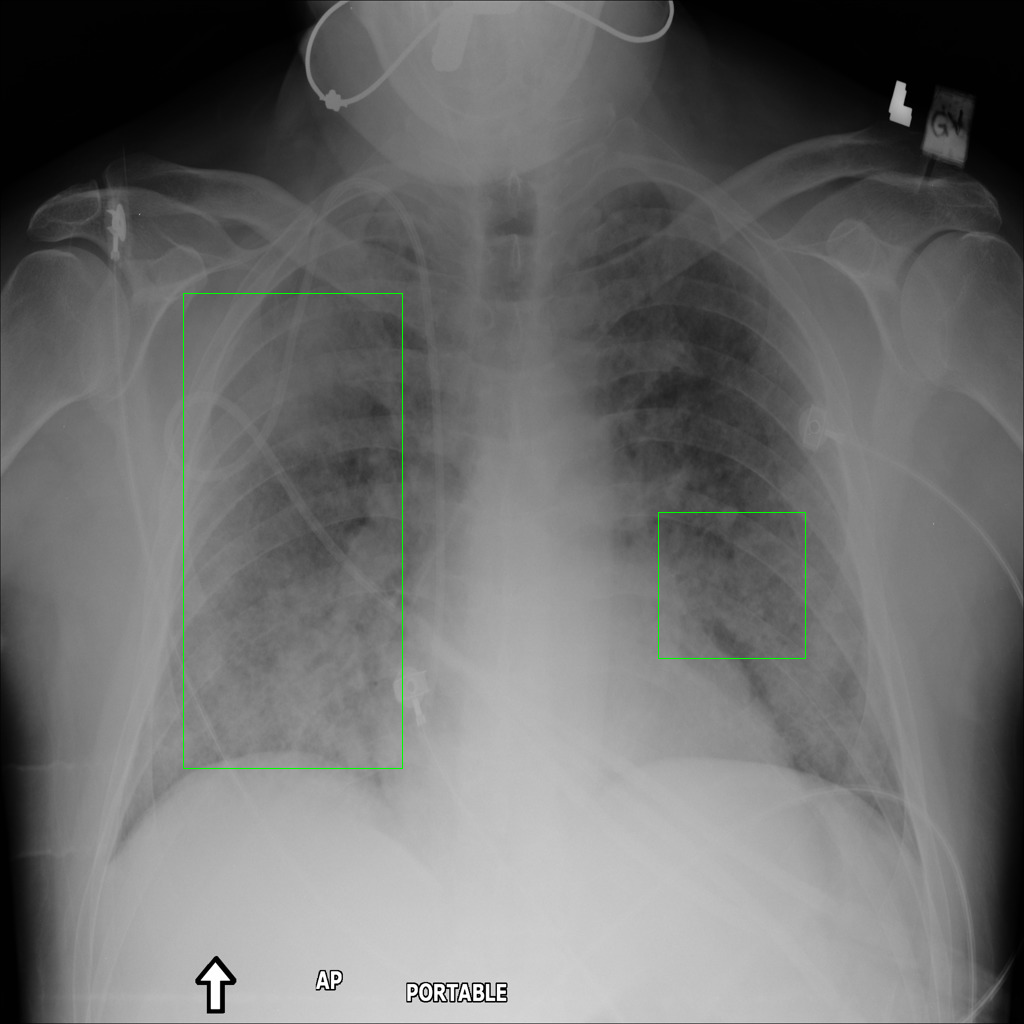

In [0]:
import cv2
from google.colab.patches import cv2_imshow


WEIGHTS_FILE = "model-0.36.h5"

THRESHOLD = 0.5
EPSILON = 0.02

model = create_model()
model.load_weights(WEIGHTS_FILE)
# filename = './stage_2_train_PNG/d955b013-2d49-4afd-8218-40f5e3af8312.png' # For Normal case
filename = './stage_2_test_PNG/c0808f4b-2487-4786-a204-3b76b8ec3313.png' # For Lung Opacity case
unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

region = np.squeeze(model.predict(feat_scaled[np.newaxis,:]))

output = np.zeros(region.shape, dtype=np.uint8)
output[region > 0.5] = 1

contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
            approx = cv2.approxPolyDP(cnt, EPSILON * cv2.arcLength(cnt, True), True)
            x, y, w, h = cv2.boundingRect(approx)

            x0 = np.rint(x * unscaled.shape[1] / output.shape[1]).astype(int)
            x1 = np.rint((x + w) * unscaled.shape[1] / output.shape[1]).astype(int)
            y0 = np.rint(y * unscaled.shape[0] / output.shape[0]).astype(int)
            y1 = np.rint((y + h) * unscaled.shape[0] / output.shape[0]).astype(int)
            cv2.rectangle(unscaled, (x0, y0), (x1, y1), (0, 255, 0), 1)

cv2_imshow(unscaled)
cv2.waitKey(0)
cv2.destroyAllWindows()
